In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.close("all")

In [2]:
products = pd.read_csv(
    'D:/University of Cincinnati/Fall 2022/Cloud Computing/final/8451_The_Complete_Journey_2_Sample/400_products.csv').rename(columns=lambda x: x.strip())
households = pd.read_csv(
    'D:/University of Cincinnati/Fall 2022/Cloud Computing/final/8451_The_Complete_Journey_2_Sample/400_households.csv').rename(columns=lambda x: x.strip())
transactions = pd.read_csv(
    'D:/University of Cincinnati/Fall 2022/Cloud Computing/final/8451_The_Complete_Journey_2_Sample/400_transactions.csv').rename(columns=lambda x: x.strip())


joined = transactions.join(products, on='PRODUCT_NUM', how='left', rsuffix='_prd').join(households, on='HSHD_NUM', how='left', rsuffix='_prd')
joined = joined[['HSHD_NUM', 'L', 'AGE_RANGE', 'MARITAL', 'INCOME_RANGE', 'HOMEOWNER', 'HSHD_COMPOSITION', 'HH_SIZE', 'CHILDREN', 'BASKET_NUM', 'PURCHASE_', 'PRODUCT_NUM', 'SPEND', 'UNITS','STORE_R', 'WEEK_NUM', 'YEAR','DEPARTMENT','COMMODITY', 'BRAND_TY', 'NATURAL_ORGANIC_FLAG']]
joined = joined.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [3]:
joined['CUMSPEND'] = joined.apply(lambda row: row['SPEND']*row['UNITS'], axis=1)
joined['PURCHASE_'] = pd.to_datetime(joined['PURCHASE_'])
joined.columns = joined.columns.str.strip()


<BarContainer object of 25 artists>

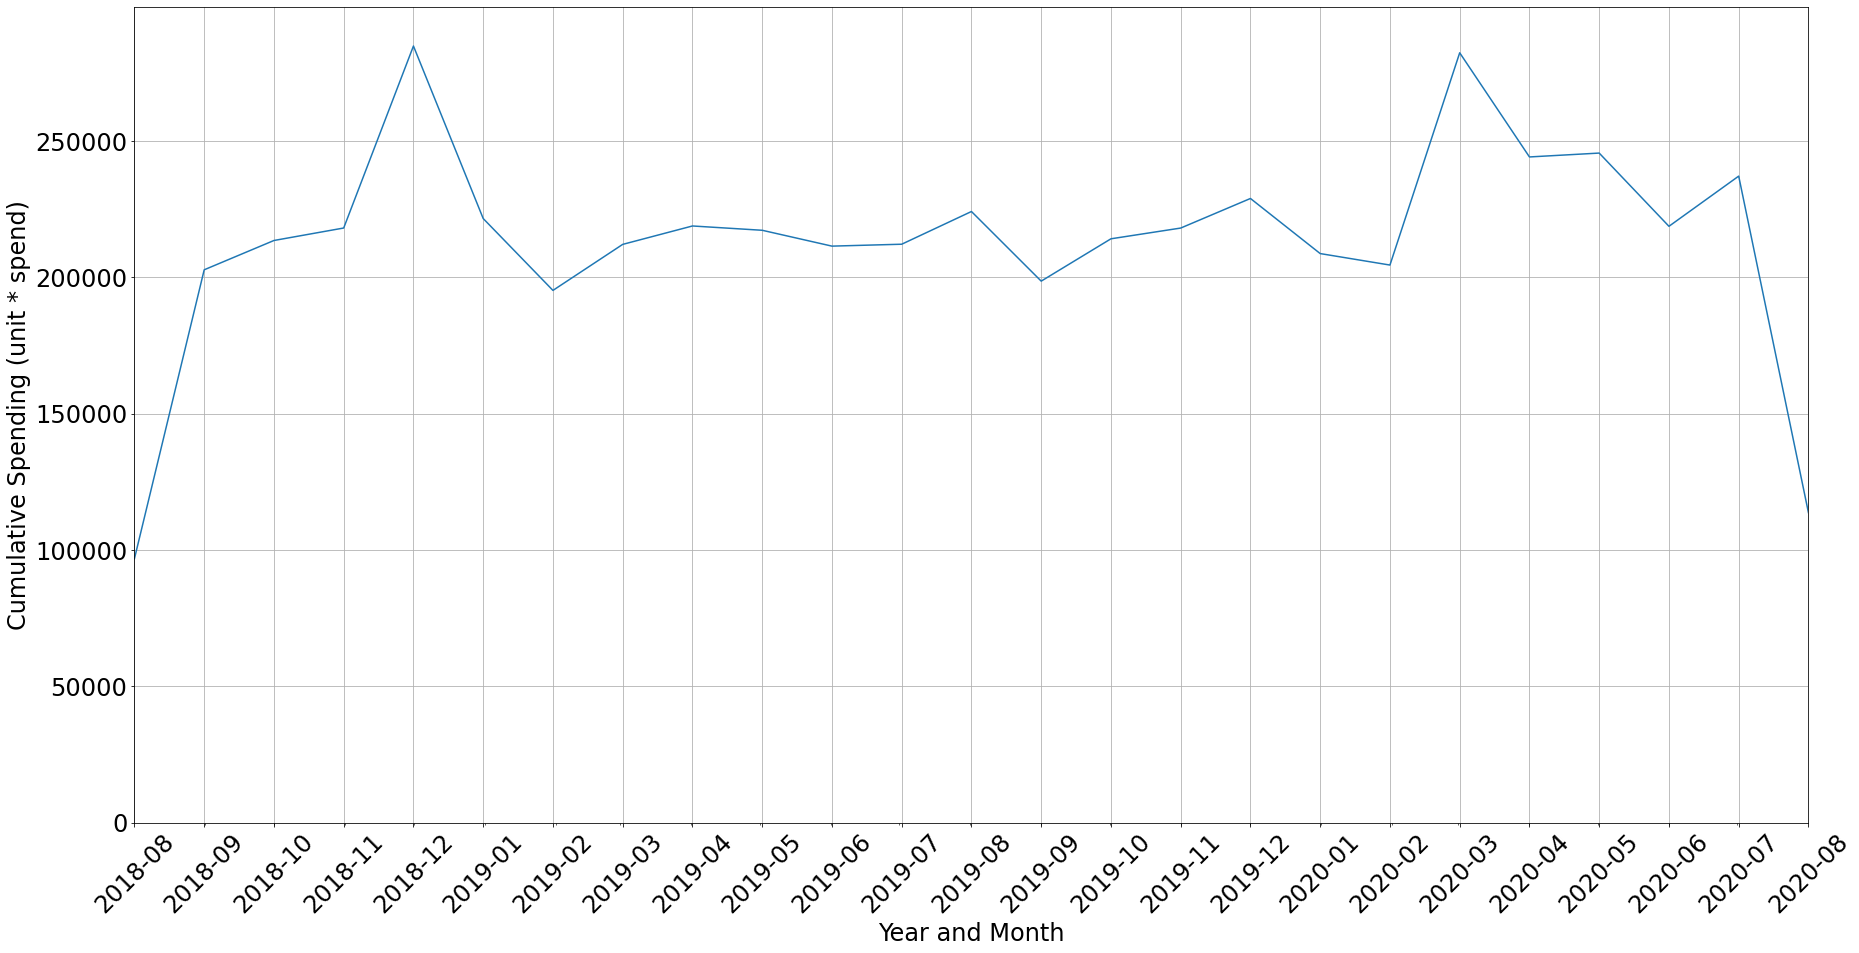

In [4]:
spends = joined.groupby(joined.PURCHASE_.dt.to_period('M'))['CUMSPEND']
xlabels = spends.groups.keys()
spends = spends.sum().tolist()
dates = pd.date_range(start="2018-08", end='2020-08', periods=25)
ts = pd.Series(spends, index=dates)
# ts = ts.cumsum()
ax = ts.plot(figsize=(30,15), grid=True)
ax.set_xlabel("Year and Month", fontsize=24)
ax.set_ylabel("Cumulative Spending (unit * spend)", fontsize=24)
plt.xticks(rotation=45,ticks = dates, labels = xlabels, fontsize=24)
plt.yticks(fontsize=24)
ax.bar(dates, spends)

# spends = joined.groupby(joined.PURCHASE_)['CUMSPEND'].sum().tolist()
# dates = pd.date_range(start="2018-08-17", end='2020-08-15', periods=728)
# ts = pd.Series(spends, index=dates)
# # ts = ts.cumsum()
# ts.plot().bar(dates, spends)

<BarContainer object of 7 artists>

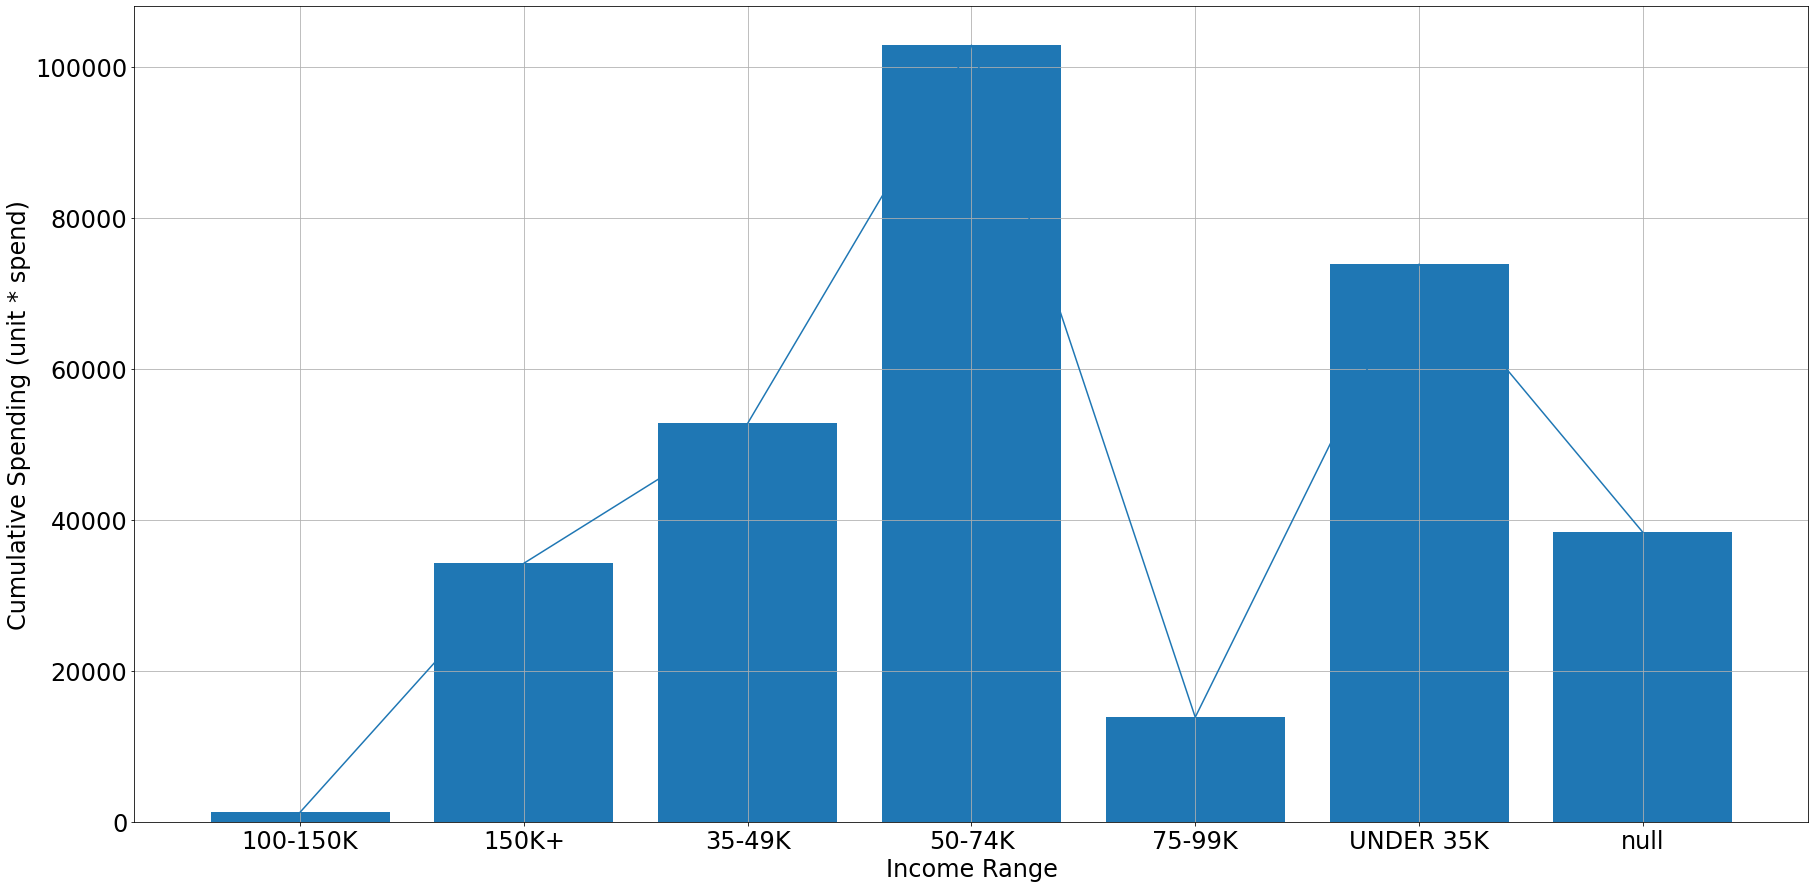

In [5]:
grouped = joined.groupby('INCOME_RANGE')['CUMSPEND']
spends = grouped.sum().tolist()
dates = grouped.groups.keys()
ts = pd.Series(spends, index=dates)
plt.xlabel("Income Range", fontsize=24)
plt.ylabel("Cumulative Spending (unit * spend)", fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
# ts.plot()
ts.plot(figsize=(30,15), grid=True).bar(dates, spends)


([<matplotlib.axis.XTick at 0x1d5002af6d0>,
 [Text(583, 0, '2018-09'),
  Text(583, 0, '2018-09'),
  Text(584, 0, '2018-10'),
  Text(585, 0, '2018-11'),
  Text(586, 0, '2018-12'),
  Text(587, 0, '2019-01'),
  Text(588, 0, '2019-02'),
  Text(590, 0, '2019-03'),
  Text(591, 0, '2019-04'),
  Text(592, 0, '2019-05'),
  Text(593, 0, '2019-06'),
  Text(594, 0, '2019-07'),
  Text(595, 0, '2019-09'),
  Text(595, 0, '2019-09'),
  Text(597, 0, '2019-11'),
  Text(597, 0, '2019-11'),
  Text(599, 0, '2020-01'),
  Text(599, 0, '2020-01'),
  Text(600, 0, '2020-02'),
  Text(602, 0, '2020-03'),
  Text(603, 0, '2020-04'),
  Text(604, 0, '2020-05'),
  Text(605, 0, '2020-06'),
  Text(606, 0, '2020-07'),
  Text(607, 0, '2020-08')])

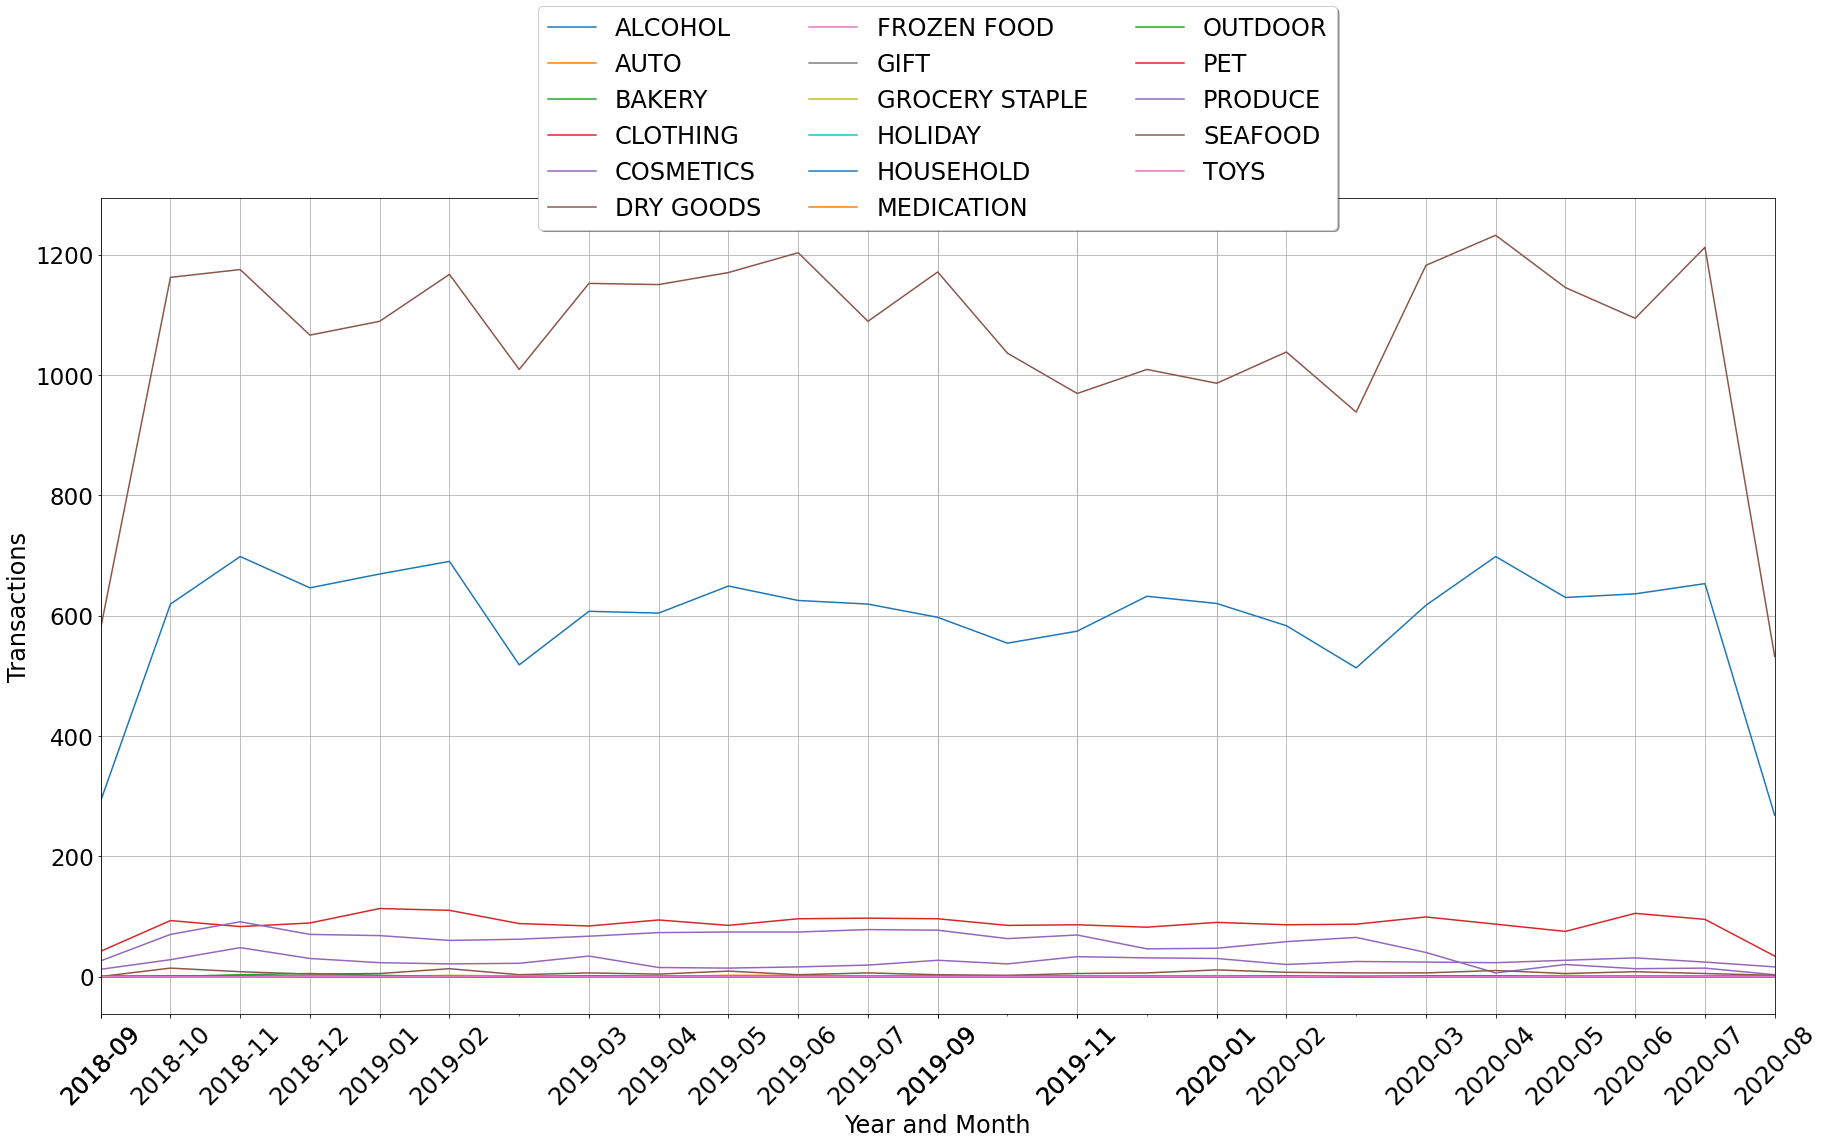

In [6]:
# growing shrinking categories
# joined['PURCHASE_'] = joined.apply(lambda row: pd.to_datetime(row['PURCHASE_']), axis=1)
# joined = joined.sort_values(by='PURCHASE_', ascending=True)
# pd.read_csv("../data/air_quality_no2_long.csv", parse_dates=["datetime"])

categories = joined.groupby([joined.PURCHASE_.dt.to_period('M'), 'COMMODITY'])['COMMODITY'].size().unstack(fill_value=0)
# categories = categories.pivot(index='PURCHASE_', columns='COMMODITY', values='y')
# pd.Series()
dates = pd.date_range(start="2018-08", end='2020-08', periods=25)
# ts = pd.Series(categories]'')
# ts = ts.cumsum()
# ts.plot()
# dates = pd.date_range(start="2018-08-17", end='2020-08-15', periods=728)
# ts = pd.Series(categories, index=dates)
# ax = plt.gca()
# import matplotlib

# ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
# ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))
# plt.plot(categories, linewidth=0.5)
# plt.show()   

ax = categories.plot(figsize=(30, 15), grid=True)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25),
          ncol=3, fancybox=True, shadow=True, prop={'size': 24})
ax.set_xlabel("Year and Month", fontsize=24)
ax.set_ylabel("Transactions", fontsize=24)
plt.yticks(fontsize=23)
plt.xticks(rotation=45, fontsize=24, ticks = dates, labels = xlabels)

['ALCOHOL', 'AUTO', 'BAKERY', 'CLOTHING', 'COSMETICS', 'DRY GOODS', 'FROZEN FOOD', 'GIFT', 'GROCERY STAPLE', 'HOLIDAY', 'HOUSEHOLD', 'MEDICATION', 'OUTDOOR', 'PET', 'PRODUCE', 'SEAFOOD', 'TOYS']


<BarContainer object of 17 artists>

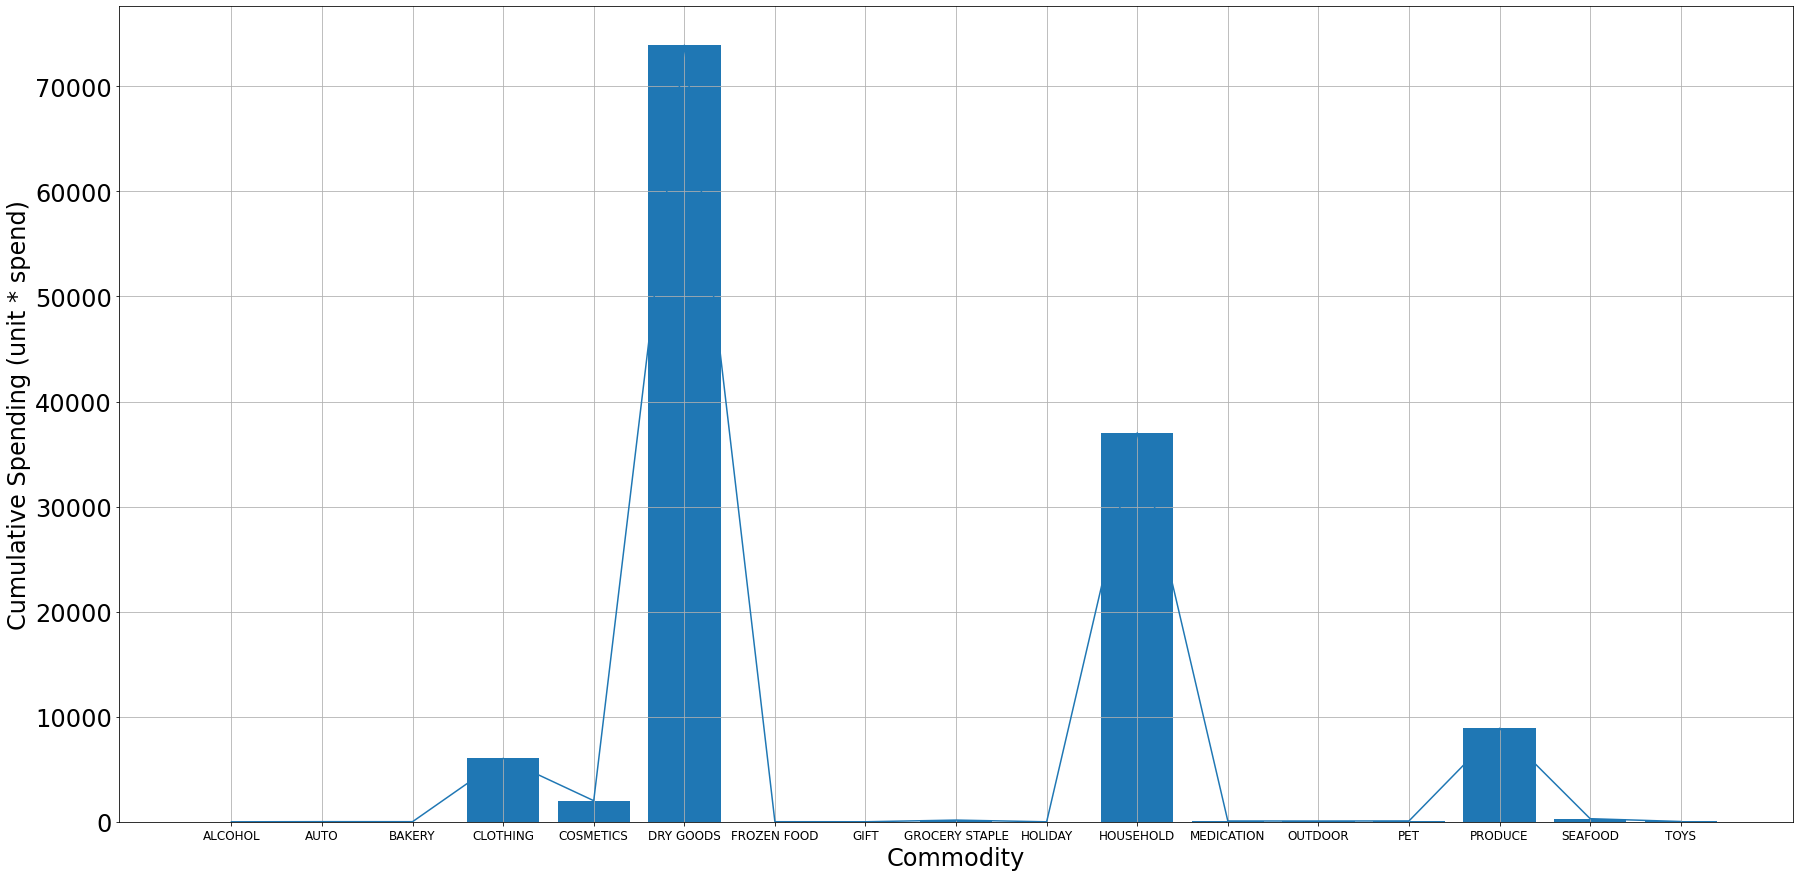

In [7]:
grouped = joined.groupby('COMMODITY')['CUMSPEND']
spends = grouped.sum().tolist()
dates = list(grouped.groups.keys())
print(dates)
ts = pd.Series(spends, index=dates)
plt.xlabel("Commodity", fontsize=24)
plt.ylabel("Cumulative Spending (unit * spend)", fontsize=24)
plt.xticks(fontsize=12, ticks=range(0, len(dates)), labels=dates)
plt.yticks(fontsize=24)
# ts.plot()
ts.plot(figsize=(30,15), grid=True).bar(dates, spends)

<BarContainer object of 3 artists>

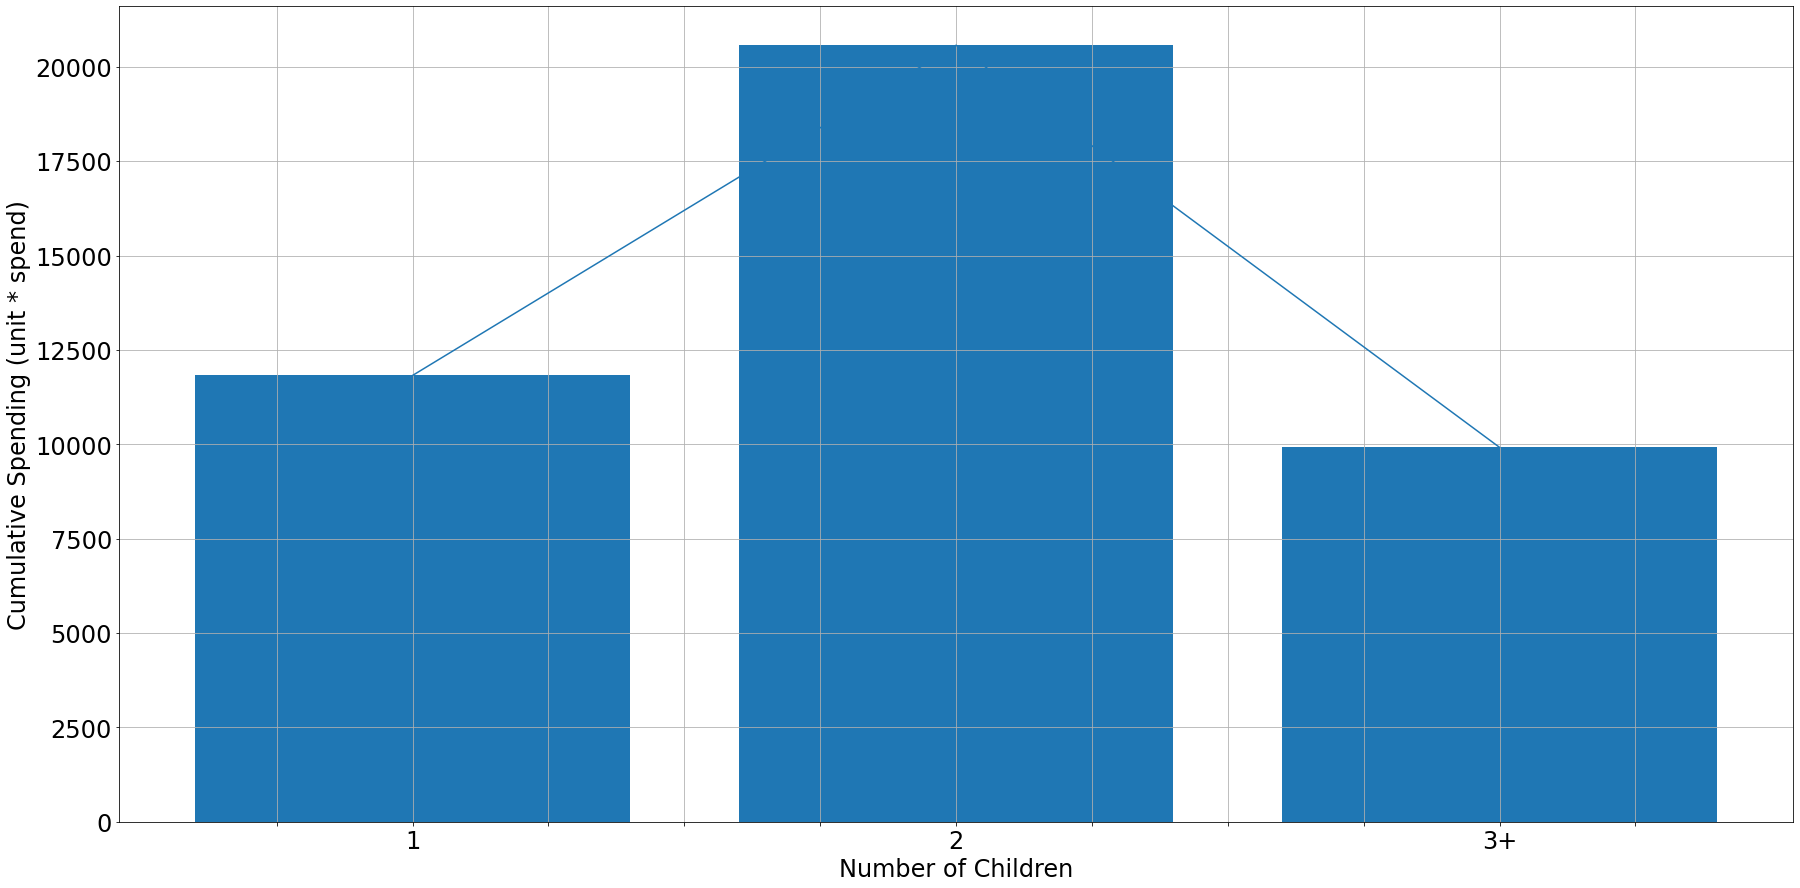

In [8]:
grouped = joined.groupby('CHILDREN')['CUMSPEND']
spends = grouped.sum().tolist()
dates = grouped.groups.keys()
ts = pd.Series(spends, index=dates)
plt.xlabel("Number of Children", fontsize=24)
plt.ylabel("Cumulative Spending (unit * spend)", fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
# ts.plot()
ts.plot(figsize=(30,15), grid=True).bar(dates, spends)


<BarContainer object of 6 artists>

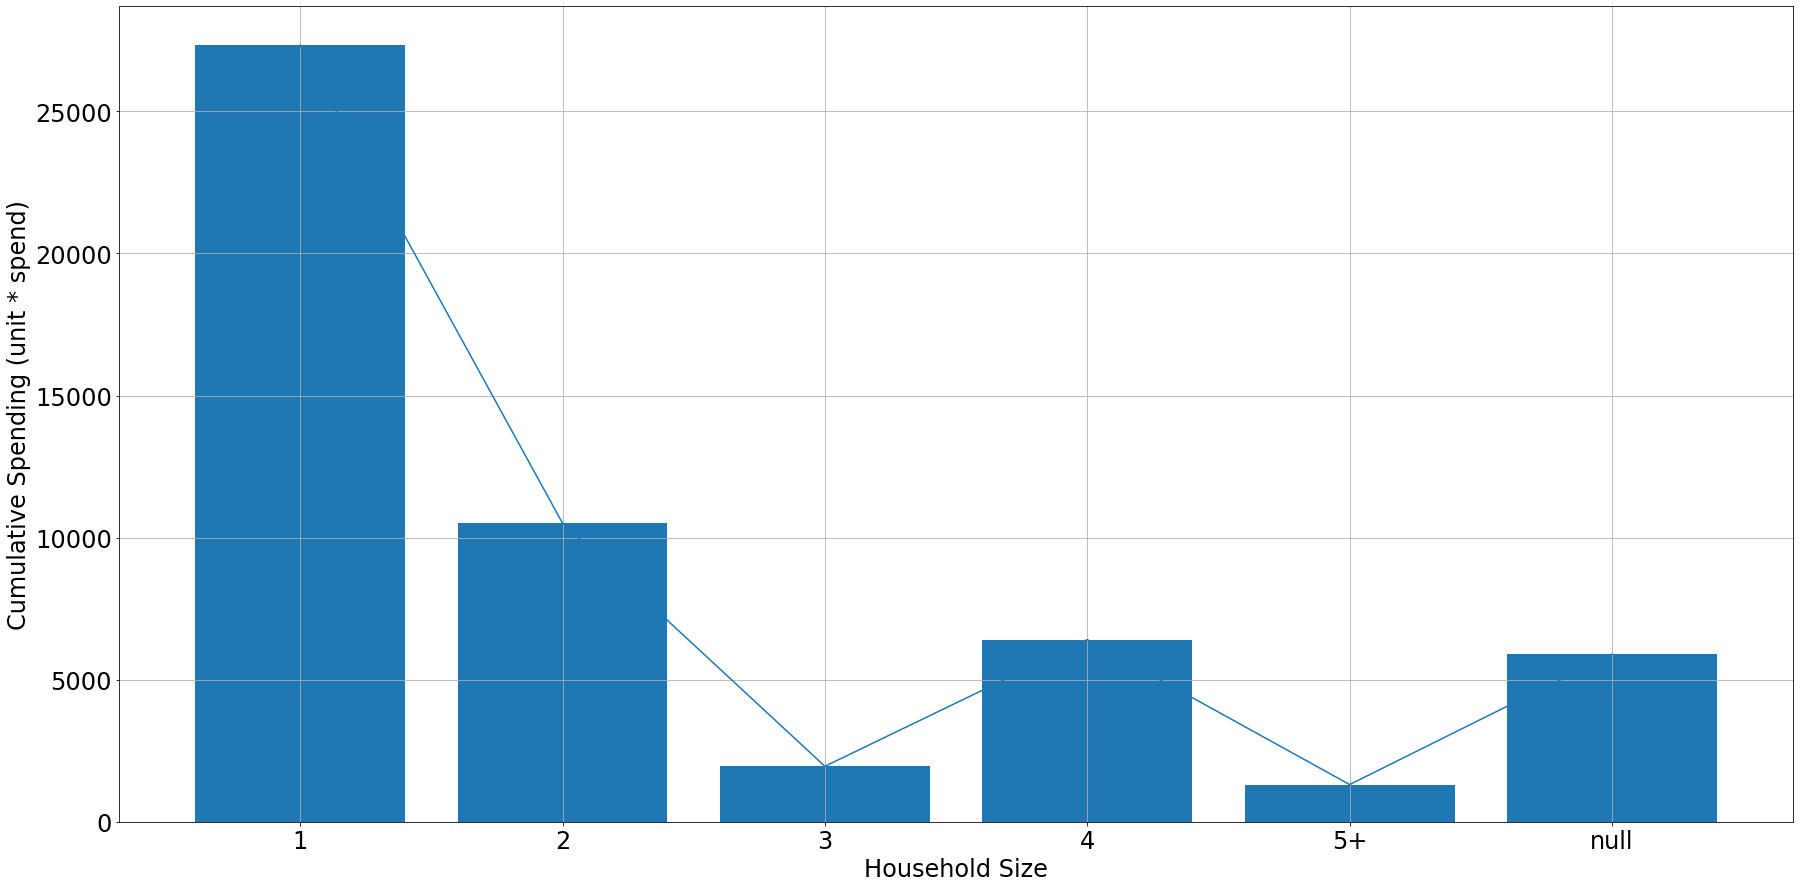

In [21]:
grouped = joined.groupby('HH_SIZE')['CUMSPEND']
spends = grouped.sum().tolist()
dates = grouped.groups.keys()
ts = pd.Series(spends, index=dates)
plt.xlabel("Household Size", fontsize=24)
plt.ylabel("Cumulative Spending (unit * spend)", fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
# ts.plot()
ts.plot(figsize=(30,15), grid=True).bar(dates, spends)


<BarContainer object of 25 artists>

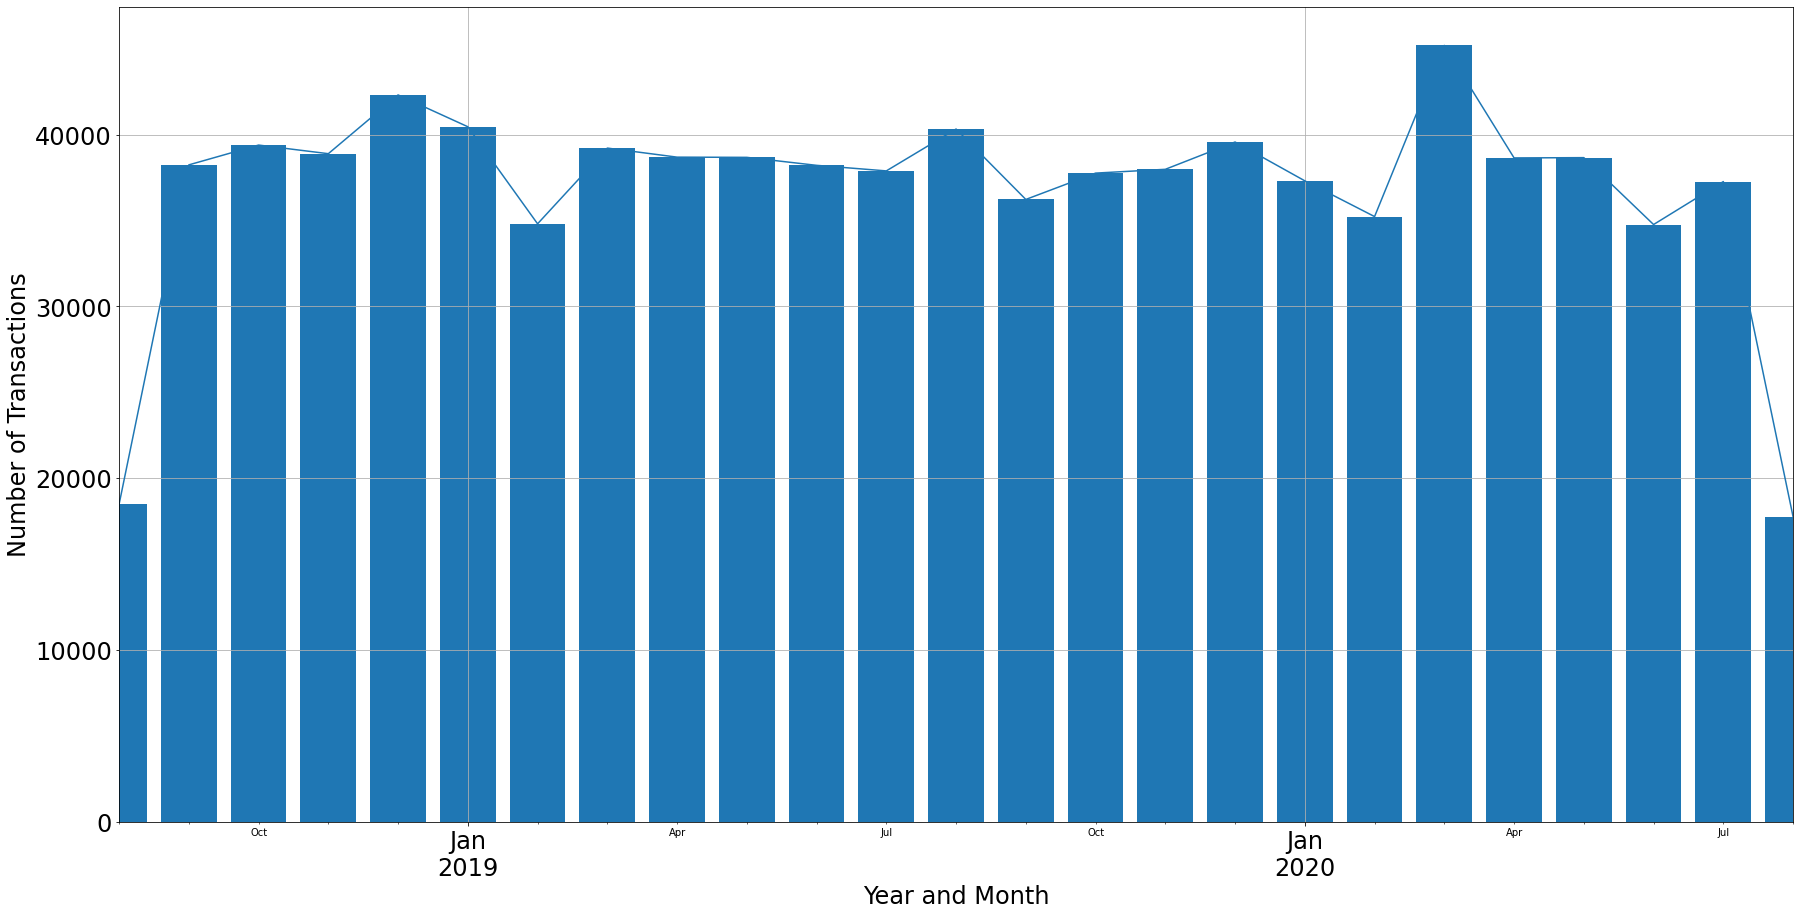

In [37]:
# spends = grouped.sum().tolist()
grouped = joined.groupby(joined.PURCHASE_.dt.to_period('M'))
spends = grouped.size()
dates = grouped.groups.keys()
ts = pd.Series(spends, index=dates)
plt.xlabel("Year and Month", fontsize=24)
plt.ylabel("Number of Transactions", fontsize=24)
plt.xticks(rotation=45,ticks = range(0,len(dates)), labels = dates, fontsize=24)
plt.yticks(fontsize=24)
# .plot(figsize=(30,15), grid=True)
# # ts.plot()
ts.plot(figsize=(30,15), grid=True).bar(dates, spends)


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 [Text(-1.0, 0, 'null'),
  Text(0.0, 0, '100-150K'),
  Text(1.0, 0, '150K+'),
  Text(2.0, 0, '35-49K'),
  Text(3.0, 0, '50-74K'),
  Text(4.0, 0, '75-99K'),
  Text(5.0, 0, 'UNDER 35K'),
  Text(6.0, 0, 'null'),
  Text(7.0, 0, '')])

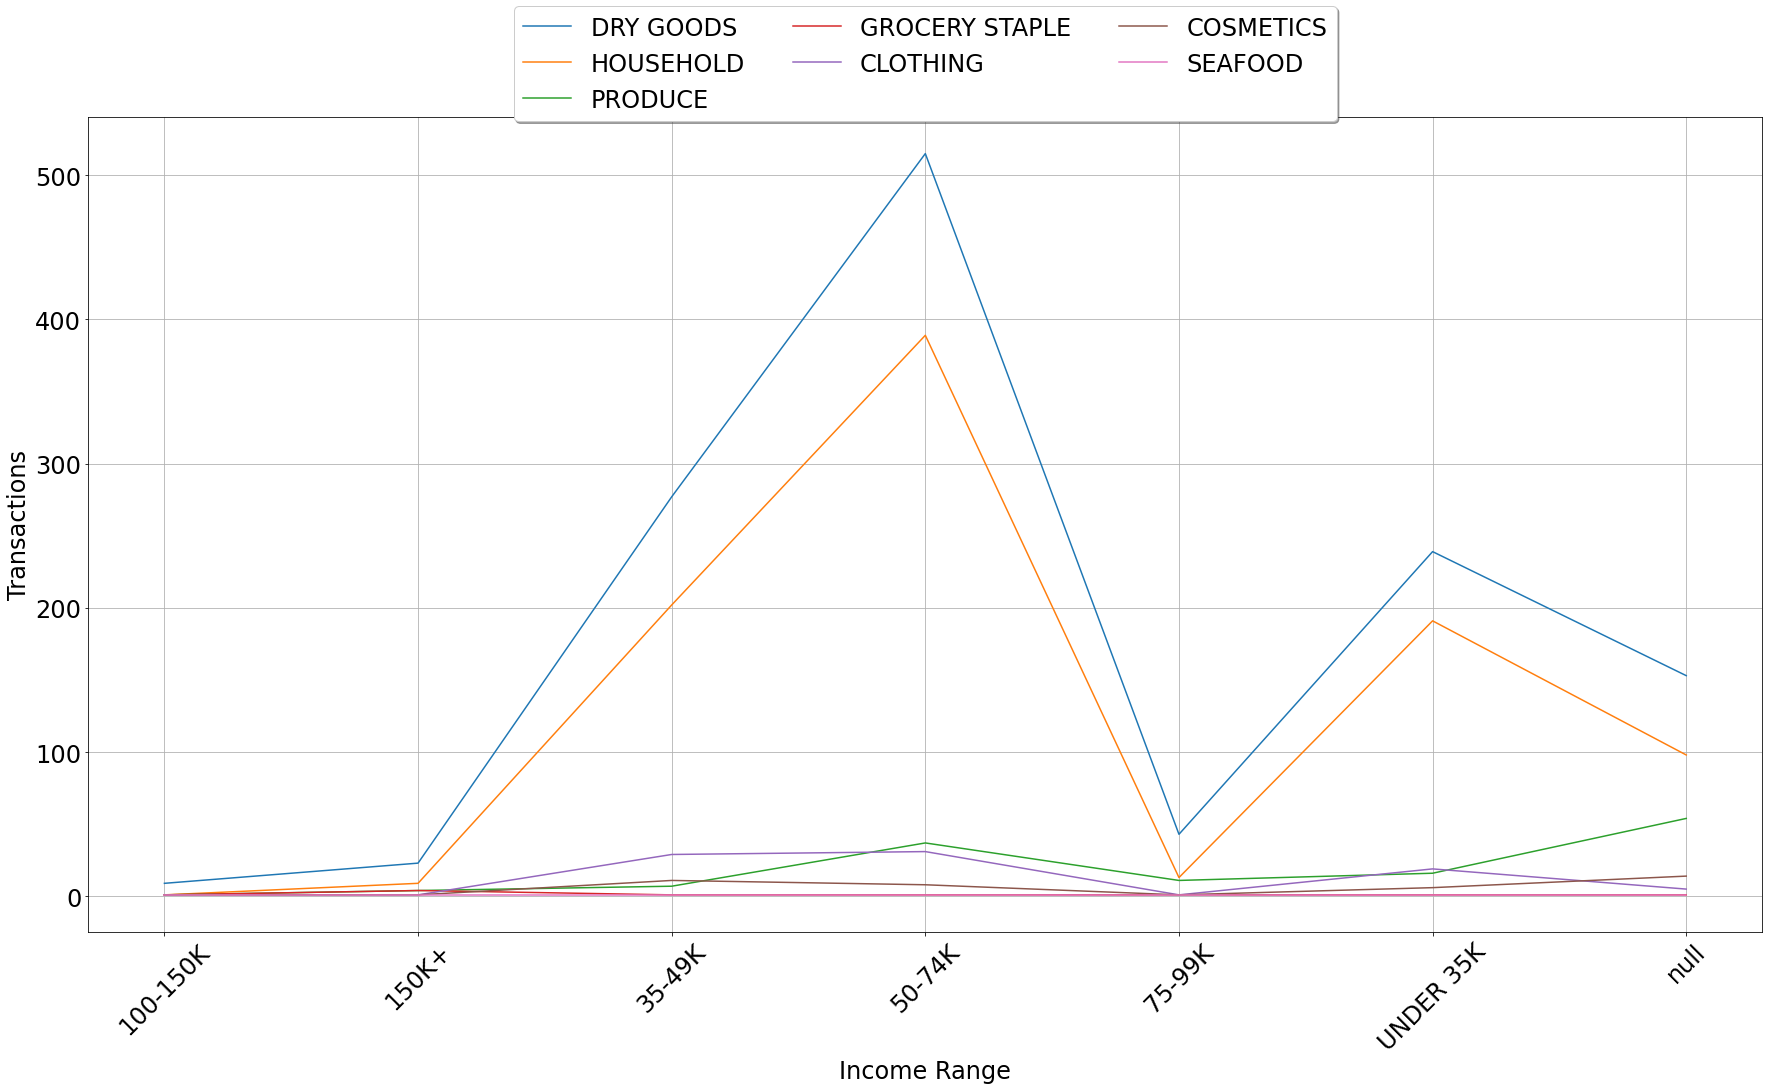

In [66]:
# growing shrinking categories
categories = joined.groupby([joined.INCOME_RANGE, 'COMMODITY'])['COMMODITY'].size().unstack(fill_value=1)

ax = categories.plot(figsize=(30, 15), grid=True)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=3, fancybox=True, shadow=True, prop={'size': 24})
ax.set_xlabel("Income Range", fontsize=24)
ax.set_ylabel("Transactions", fontsize=24)
plt.yticks(fontsize=24)
plt.xticks(rotation=45, fontsize=24)